In [1]:
from tensorflow.keras.datasets import cifar100
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop

In [22]:
img_width  = 32
img_height = 32
channels   = 3

num_classes = 100

batch_size = 50
num_epochs = 50
# iterations = 5
# nb_augmentation = 2

In [6]:
import tensorflow as tf

def preprocess_data(images, targets, use_augmentation=False, nb_of_augmentation=1):
    """
    images: raw image
    targets: target label
    use_augmentation: True if augmentation should be used
    nb_of_augmentation: If use_augmentation=True, number of augmentations
    """
    X = []
    y = []
    for x_, y_ in zip(images, targets):
        
        # scaling pixels between 0.0-1.0
        x_ = x_ / 255.
        
        # data Augmentation
        if use_augmentation:
            argu_img = image_augmentation(x_, nb_of_augmentation)
            for a in argu_img:
                X.append(a.reshape(img_height, img_width, channels))
                y.append(y_)

        X.append(x_)
        y.append(y_)
    print('*Preprocessing completed: %i samples\n' % len(X))
    return np.array(X), tf.keras.utils.to_categorical(y)

In [7]:
X_train = X_train.reshape(-1, 32, 32, 3)

In [8]:
X_train_shaped, y_train_shaped = preprocess_data(X_train, Y_train)

*Preprocessing completed: 50000 samples



In [9]:
X_test_shaped, y_test_shaped   = preprocess_data(X_test,  Y_test)

*Preprocessing completed: 10000 samples



In [26]:
def create_model():
    """
    Creates a simple sequential model
    """
    
    cnn = tf.keras.Sequential()
    
    cnn.add(tf.keras.layers.InputLayer(input_shape=(img_height,img_width,channels)))
    
    cnn.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu'))
    cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(tf.keras.layers.Dropout(0.1))

    cnn.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(tf.keras.layers.Dropout(0.3))

    cnn.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu'))
    cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(tf.keras.layers.Dropout(0.1))

    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(512, activation='relu'))
    cnn.add(tf.keras.layers.Dense(256, activation='relu'))

    cnn.add(tf.keras.layers.Dropout(0.2))

    cnn.add(tf.keras.layers.Dense(128, activation='relu'))
    cnn.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    return cnn

create_model().summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)        

In [11]:
from sklearn.model_selection import train_test_split
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_shaped, y_train_shaped,test_size=0.2, random_state=42)

In [27]:
cnn = create_model()
history = cnn.fit(
                    X_train_,
                    y_train_,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_, y_val_)
                )

Epoch 1/50
800/800 [==============================] - 12s 14ms/step - loss: 4.3287 - accuracy: 0.0299 - val_loss: 4.0414 - val_accuracy: 0.0578
Epoch 2/50
800/800 [==============================] - 11s 13ms/step - loss: 3.9435 - accuracy: 0.0796 - val_loss: 3.7292 - val_accuracy: 0.1229
Epoch 3/50
800/800 [==============================] - 11s 13ms/step - loss: 3.6456 - accuracy: 0.1324 - val_loss: 3.4710 - val_accuracy: 0.1684
Epoch 4/50
800/800 [==============================] - 11s 14ms/step - loss: 3.4343 - accuracy: 0.1713 - val_loss: 3.2629 - val_accuracy: 0.2040
Epoch 5/50
800/800 [==============================] - 11s 14ms/step - loss: 3.2899 - accuracy: 0.1980 - val_loss: 3.2171 - val_accuracy: 0.2217
Epoch 6/50
800/800 [==============================] - 11s 13ms/step - loss: 3.1722 - accuracy: 0.2191 - val_loss: 3.0738 - val_accuracy: 0.2403
Epoch 7/50
800/800 [==============================] - 11s 13ms/step - loss: 3.0704 - accuracy: 0.2397 - val_loss: 2.9433 - val_accuracy:

In [28]:
def plot_acc_loss(title, model, key_acc, key_loss):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # Accuracy
    ax1.set_title('Model accuracy (%s)' % title)
    names = []
    ax1.plot(model[key_acc])
    ax1.set_xlabel('epoch')
    names.append('Model')
    ax1.set_ylabel('accuracy')
    ax1.legend(names, loc='upper left')
    
    # Loss
    ax2.set_title('Model loss')
    ax2.plot(model[key_loss])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax2.legend(names, loc='upper right')
    fig.set_size_inches(20, 5)
    plt.show()

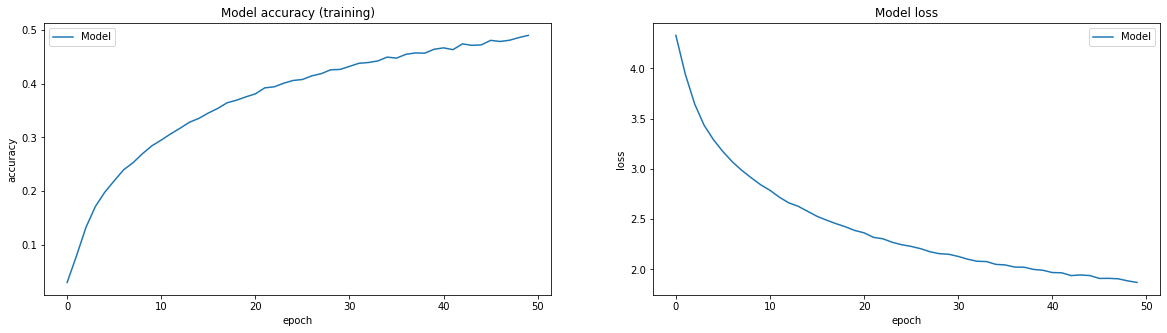

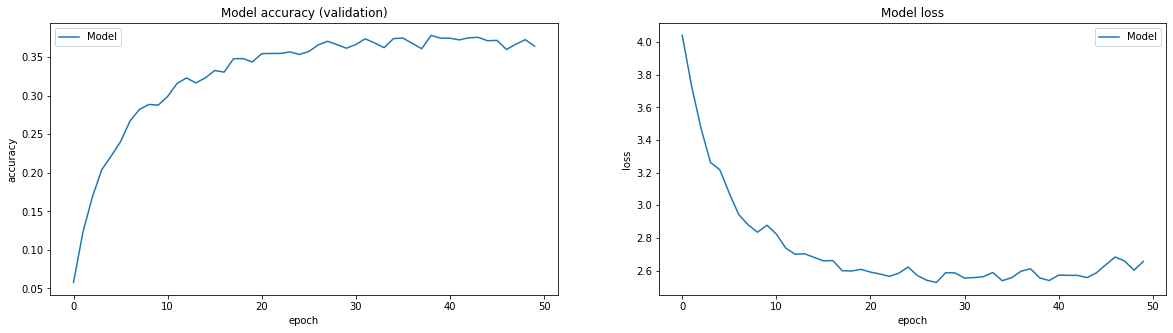

In [29]:
plot_acc_loss('training', history.history, 'accuracy', 'loss')
plot_acc_loss('validation', history.history, 'val_accuracy', 'val_loss')